# Fitting for authors with at least 28 publications (so  4607 authors, the 1.98% of the total data) -> brings to beta = 1 

In [14]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize 

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.events import *
from myLibraries.theoretical_functions import *

In [7]:
HOLE_SIZE = 28
ACTIVITY = 0
MIN_PUBS = 28
EVENTS = get_collabs_event()
ALL_EVENTS = get_allEvents(EVENTS)

YEARS = get_str_years_event()

# get rid of misleading years
YEARS_TO_CONSIDER = YEARS[1: -6]
EVENTS_TO_CONSIDER = EVENTS[1: -6]

In [3]:
# how many authors with total number of publications >= minPubs? 

df = get_all_collabs()
max_pubs = df["tot_pubs"].max()

print("#pubs", "#auths", "percentage")
for minPubs in range(45):
    num_auths = len(get_all_collabs_by_hole_size(HOLE_SIZE, ACTIVITY, minPubs))
    print(minPubs, num_auths, "%.2f" % ((num_auths/len(df))*100), "%")

#pubs #auths percentage
0 232838 100.00 %
1 232838 100.00 %
2 106387 45.69 %
3 69048 29.65 %
4 50247 21.58 %
5 38913 16.71 %
6 31309 13.45 %
7 26062 11.19 %
8 22303 9.58 %
9 19442 8.35 %
10 17115 7.35 %
11 15288 6.57 %
12 13722 5.89 %
13 12402 5.33 %
14 11316 4.86 %
15 10346 4.44 %
16 9557 4.10 %
17 8840 3.80 %
18 8246 3.54 %
19 7679 3.30 %
20 7212 3.10 %
21 6780 2.91 %
22 6369 2.74 %
23 6014 2.58 %
24 5674 2.44 %
25 5380 2.31 %
26 5095 2.19 %
27 4835 2.08 %
28 4607 1.98 %
29 4380 1.88 %
30 4186 1.80 %
31 3998 1.72 %
32 3799 1.63 %
33 3597 1.54 %
34 3426 1.47 %
35 3272 1.41 %
36 3137 1.35 %
37 3006 1.29 %
38 2872 1.23 %
39 2729 1.17 %
40 2621 1.13 %
41 2504 1.08 %
42 2389 1.03 %
43 2292 0.98 %
44 2193 0.94 %


# **Logarithmic Trajectories**

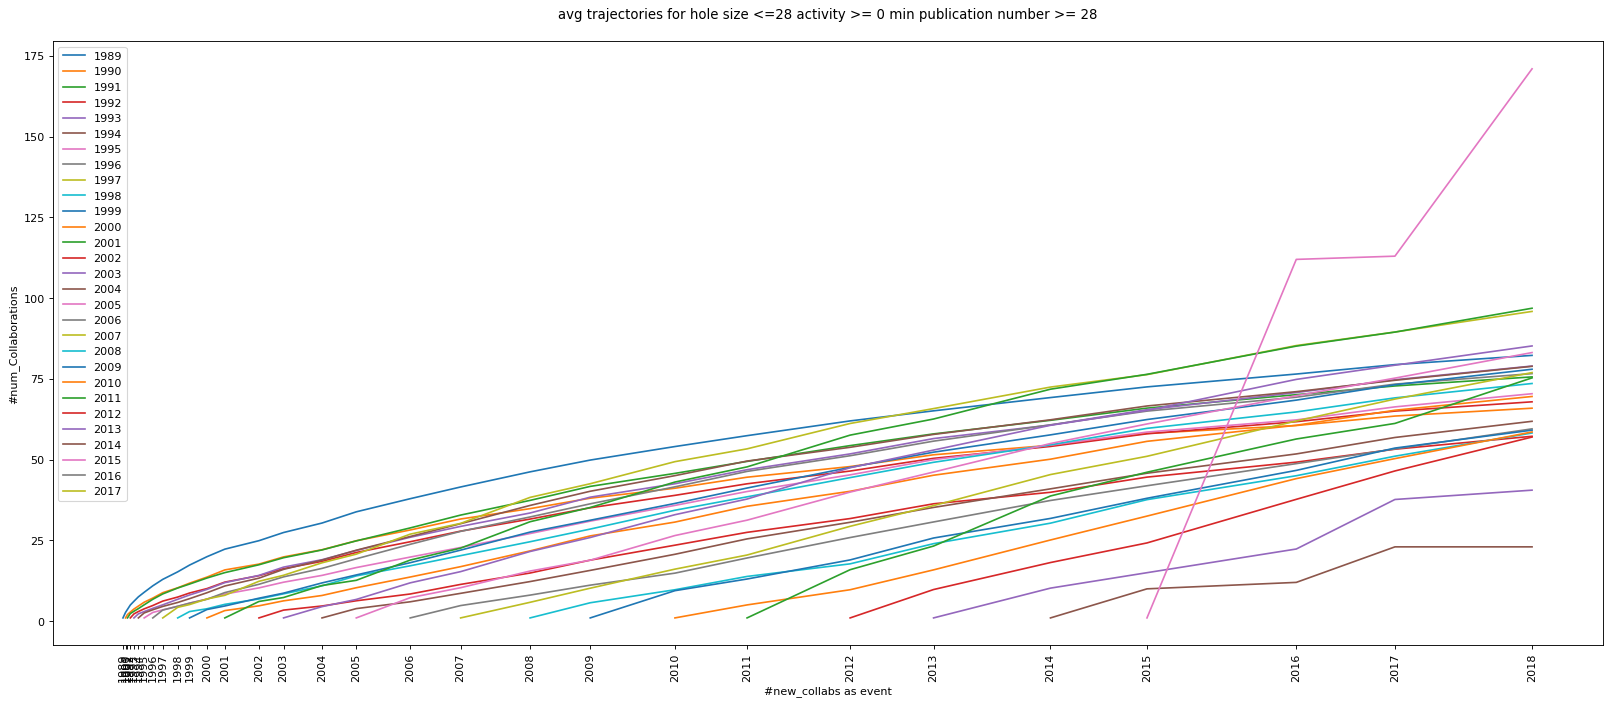

In [4]:
## Plot average trajectories 
plt.figure(figsize=(25, 10), dpi=80)
plt.title("avg trajectories for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) + "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS[:-1]:
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
    
    if(len(y)==1):
        plt.scatter(x,y)
    else:
        plt.plot(x,y)
    
    plt.xticks(x, y)
    plt.xticks(rotation='vertical')
    
plt.legend(YEARS, loc='upper left')
plt.xticks(EVENTS, YEARS)
plt.show()

# **(2) Plotting fitting function**

In [6]:
# how many authors by startying year?
df = get_all_collabs_by_hole_size(HOLE_SIZE, ACTIVITY, MIN_PUBS)
for start_y in YEARS[:-1]:
    print(start_y, len(df[df["start_year"] == int(start_y)]))

1989 0
1990 245
1991 200
1992 272
1993 261
1994 224
1995 217
1996 295
1997 248
1998 268
1999 201
2000 246
2001 226
2002 264
2003 241
2004 201
2005 241
2006 213
2007 166
2008 138
2009 101
2010 46
2011 40
2012 28
2013 14
2014 9
2015 1
2016 1
2017 0


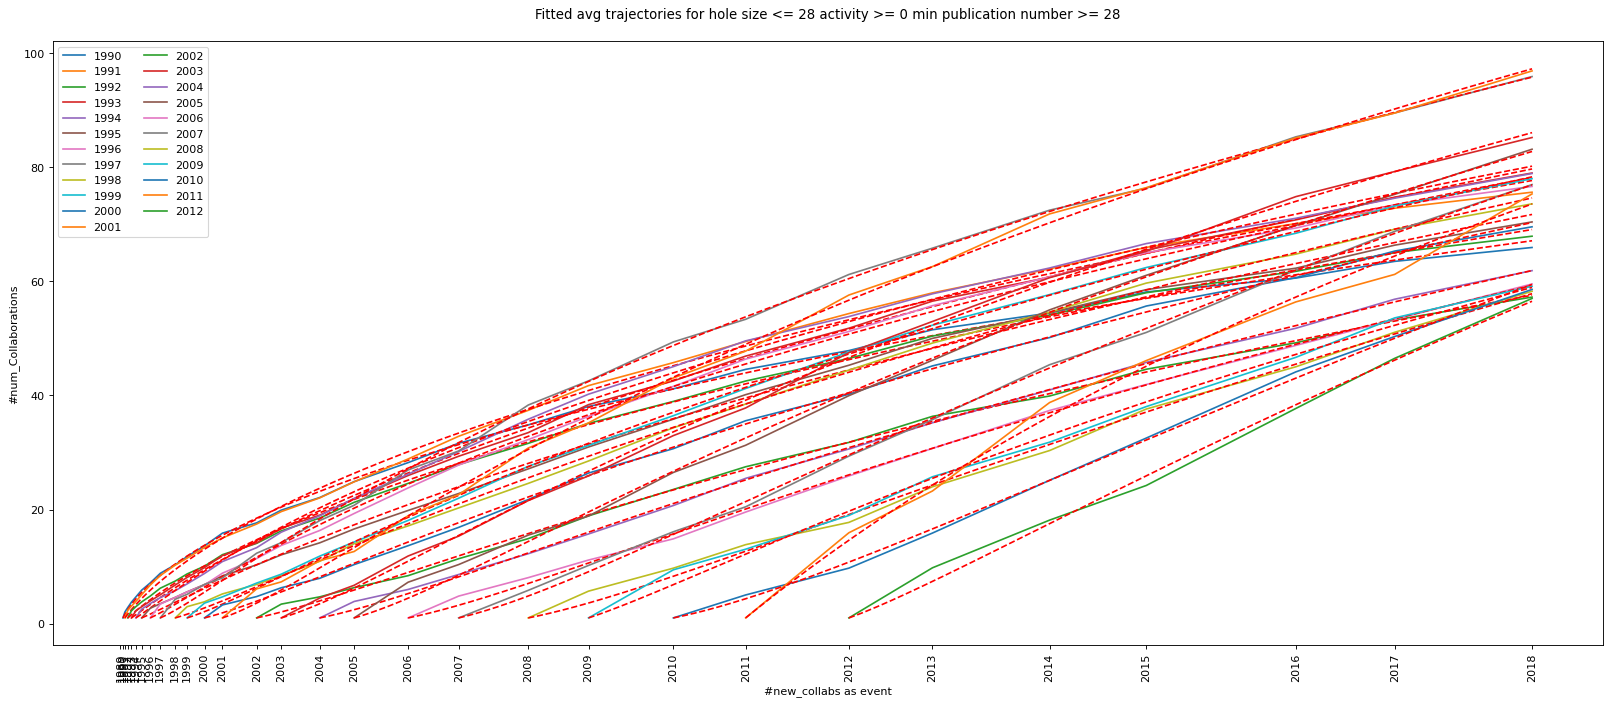

In [7]:
## Plot fitted average trajectories
plt.figure(figsize=(25, 10), dpi=80)
plt.title("Fitted avg trajectories for hole size <= " + str(HOLE_SIZE ) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) + "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

alphas = []
betas = []
for start_y in YEARS_TO_CONSIDER:
    
    
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size)     
    
    fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 
    
    xdata = [a for a in range(x[0], x[-1])]
    fit_y = theoretical_func(xdata, alpha, beta, x[0])

    # save fitted parameters alpha, beta
    alphas.append(alpha)
    betas.append(beta)
        
    plt.plot(x,y, label=str(start_y))
    plt.plot(xdata, fit_y, 'r--')
   
plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()

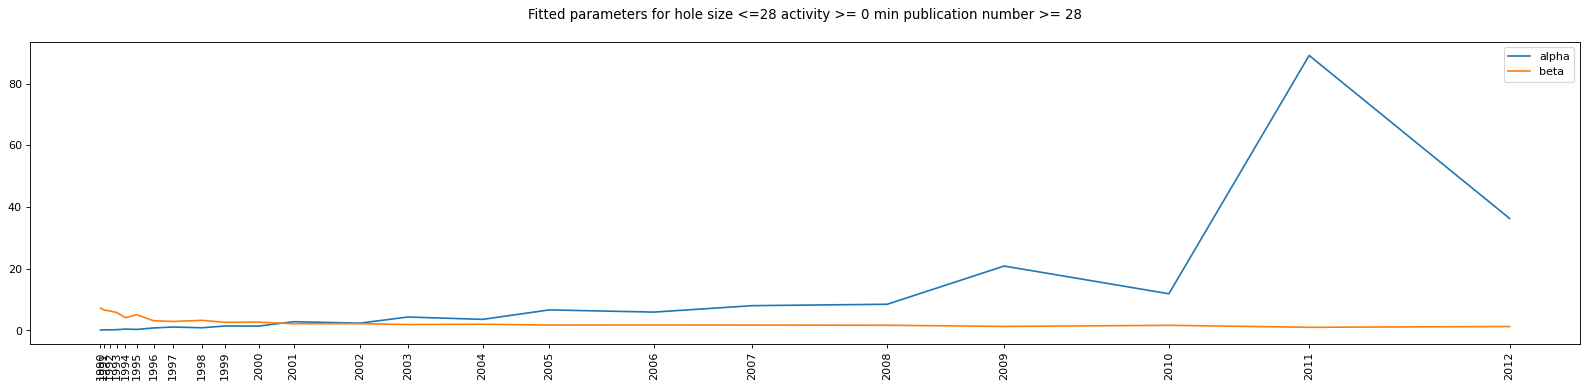

   start_y      alpha      beta
0     1990   0.125624  7.205149
1     1991   0.163178  6.581214
2     1992   0.182488  6.297938
3     1993   0.234062  5.768735
4     1994   0.422927  4.104590
5     1995   0.312216  5.103121
6     1996   0.784106  3.131836
7     1997   1.082352  2.885274
8     1998   0.853112  3.248974
9     1999   1.415730  2.608704
10    2000   1.391298  2.667833
11    2001   2.814725  2.151362
12    2002   2.338863  2.170855
13    2003   4.334193  1.901387
14    2004   3.564174  1.986819
15    2005   6.635942  1.725102
16    2006   5.925132  1.741759
17    2007   8.008894  1.722561
18    2008   8.464676  1.660752
19    2009  20.850953  1.282391
20    2010  11.865826  1.637521
21    2011  89.092158  1.000000
22    2012  36.272831  1.253393


In [8]:
## Plotting and Printing fitted parameters alpha and beta for each starting year
plt.figure(figsize=(25, 5), dpi=80)
plt.title("Fitted parameters for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) + "\n", fontdict = {'fontsize' : 12})

plt.plot(EVENTS_TO_CONSIDER, alphas, label="alpha")
plt.plot(EVENTS_TO_CONSIDER, betas, label="beta")
plt.xticks(EVENTS_TO_CONSIDER, YEARS_TO_CONSIDER)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print(pd.DataFrame([[YEARS_TO_CONSIDER[i], alphas[i], betas[i]] for i in range(len(alphas))], columns=["start_y", "alpha", "beta"]))

# **(3)** Find **alpha\* and beta\*** to have a function **f\*** minimizing the **errors**

given a starting event $i$:
- Let $e$ be a generic event
- Let $r_i(e)$ be the function representing the real average trajectory for authors who started to publish at the event $i$
- Let $f_i(e)$ be the fitted function of $r_i(e)$
- Let $f_i^*(e)$ be the general fitting function of which we want to optimized the parameters, for authors who started to publish at the event $i$

#### A) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \sum_{e\geq i} |f_i^* (e) - r_i(e) |^2 \Biggr)$
#### B) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \max_{e\geq i} |f_i^* (e) - r_i(e) |^2 \Biggr)$ 

#### C) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \sum_{e\geq i} |f_i^* (e) - f_i(e) |^2 \Biggr)$ 
#### D) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \max_{e\geq i} |f_i^* (e) - f_i(e) |^2 \Biggr)$ 

In [9]:
 ##### ERRORS FUNCTIONS FOR AVERAGE TRAJECTORIES #####

YEARS = get_str_years_event()

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_A(params, xdata, years_to_consider=YEARS):
    opt_alpha, opt_beta = params
    err = 0
    for start_y in years_to_consider:
        i = YEARS.index(start_y)
        x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
            err += pow(abs(theoretical_func(xdata[e], opt_alpha, opt_beta, xdata[i]) - y[YEARS[i:][:-1].index(curr_y)]), 2)

    sys.stdout.write('\r'+ "optimizing A function with -> params: " + str(params) +", error: "+ str(err))
    return err

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_B(params, xdata, years_to_consider=YEARS):
    opt_alpha, opt_beta = params
    
    err = 0
    for start_y in years_to_consider:
        i = YEARS.index(start_y)
        
        x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
        
        tmp = []
        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
        
            tmp.append(pow(abs(theoretical_func(xdata[e], opt_alpha, opt_beta, xdata[i]) - y[YEARS[i:][:-1].index(curr_y)]), 2))
        err += np.max(tmp)
    
    sys.stdout.write('\r'+ "optimizing B function with -> params: " + str(params) +", error: "+ str(err))
    return err

SUBSET_SIZE = 200 # the next error function works on all events, choose the number of event to be considered 

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
        ## we consider a subset of events for computational costs
def err_f_C(params, xdata, years_to_consider=YEARS):
    opt_alpha, opt_beta = params
    
    size = SUBSET_SIZE # subset of events to consider 
        
    err = 0
    for start_y in years_to_consider:
        

    
        i = YEARS.index(start_y)    
        curr_x = xdata[i]  
        
        all_events = [e for e in range(curr_x, xdata[-1])]
        next_events = all_events
        n = (len(next_events))//size
        
        if(n>0):

            events_subset = [next_events[e] for e in range(len(next_events)) if e%n==0][:size]
            
            x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
            fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 
            

            for e in events_subset:
                if(e>curr_x):
                    err += pow(abs(theoretical_func(e, opt_alpha, opt_beta, xdata[i]) - theoretical_func(e, alpha, beta, xdata[i])), 2)

    sys.stdout.write('\r'+ "optimizing C function with " + str(size) + " events -> params: " + str(params) +", error: "+ str(err))
    return err

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
        ## we consider a subset of events for computational costs
def err_f_D(params, xdata, years_to_consider=YEARS):
    
    opt_alpha, opt_beta = params
    
    size = SUBSET_SIZE # subset of events to consider 

    
    err = 0
    for start_y in years_to_consider:
        i = YEARS.index(start_y)
        
        curr_x = xdata[i] 
        
        all_events = [e for e in range(curr_x, xdata[-1])]
        next_events = all_events
        n = (len(next_events))//size
        
        if(n>0): 
            
            events_subset = [next_events[e] for e in range(len(next_events)) if e%n==0][:size]

            x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
            fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 

            tmp = []
            for e in events_subset:
                if(e>curr_x):
                    tmp.append(pow(abs(theoretical_func(e, opt_alpha, opt_beta, xdata[i]) - theoretical_func(e, alpha, beta, xdata[i])), 2))
                
            if((len(tmp))!=0):
                err += np.max(tmp)
        
    sys.stdout.write('\r'+ "optimizing D function with " + str(size) + " events -> params: " + str(params) +", error: "+ str(err))
    return err

In [10]:
## optimize alpha* and beta* for each error function defined above 
alphas_opt,betas_opt, errs = [],[],[]

start_params = [1, 1]
bnds = ((0, None), (1, None))

# retrieve alpha* and beta* minimizing the associated function and
    # compute the error made by the optimized parameters 

result_A = minimize(err_f_A, start_params, args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_A = result_A.x
alphas_opt.append(fitted_params_A[0])
betas_opt.append(fitted_params_A[1])
errs.append(err_f_A(fitted_params_A, EVENTS, YEARS_TO_CONSIDER))
print()

result_B = minimize(err_f_B, [1, 1], args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_B = result_B.x
alphas_opt.append(fitted_params_B[0])
betas_opt.append(fitted_params_B[1])
errs.append(err_f_B(fitted_params_B, EVENTS, YEARS_TO_CONSIDER))
print()


result_C = minimize(err_f_C, [1, 1], args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_C = result_C.x
alphas_opt.append(fitted_params_C[0])
betas_opt.append(fitted_params_C[1])
errs.append(err_f_C(fitted_params_C, EVENTS, YEARS_TO_CONSIDER))
print()

result_D = minimize(err_f_D, [1, 1], args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_D = result_D.x
alphas_opt.append(fitted_params_D[0])
betas_opt.append(fitted_params_D[1])
errs.append(err_f_D(fitted_params_D, EVENTS,  YEARS_TO_CONSIDER))
print()


optimizing A function with -> params: [12.23806814  1.        ], error: 138932.74061933157
optimizing B function with -> params: [17.45151399  1.        ], error: 27245.046104995125
optimizing C function with 200 events -> params: [14.87497256  1.        ], error: 2522542.281575997666
optimizing D function with 200 events -> params: [18.31776985  1.        ], error: 32617.154489172117


In [8]:
alphas_opt = [12.23806814, 17.45151399, 14.87497256, 18.31776985]
betas_opt = [1, 1, 1, 1 ]
errs = [138932.74061933157, 27245.046104995125, 2522542.281575997666, 32617.154489172117]
print()
print(pd.DataFrame([[errs[i], alphas_opt[i], betas_opt[i]] for i in range(len(errs))], ["err_f_A", "err_f_B", "err_f_C", "err_f_D"], ["ERROR", "alpha", "beta",]))


                ERROR      alpha  beta
err_f_A  1.389327e+05  12.238068     1
err_f_B  2.724505e+04  17.451514     1
err_f_C  2.522542e+06  14.874973     1
err_f_D  3.261715e+04  18.317770     1


# **(5) compare general fitting error functions A,B,C and D with the general average fitted one**  

### Error fitted trajectories

In [9]:
## get general fitting functions by starting year for each couple of parameter found above 
error_f_labels = ["A", "B", "C", "D"] 
error_fit_functions = {}

for i in range(len(error_f_labels)):
    # get general error fitted functions by starting year
    functions_by_start_y = [] # contains fitted error functions for each year 
    for start_y in YEARS_TO_CONSIDER:
        curr_x = EVENTS[YEARS.index(start_y)]  
        x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
        
        xdata = [e for e in range(x[0], x[-1])] # xdata is the list of events
        general_fit_y = theoretical_func(xdata, alphas_opt[i], betas_opt[i], curr_x)
        functions_by_start_y.append(general_fit_y)

    error_fit_functions[error_f_labels[i]] = functions_by_start_y

### **plot everything**

In [10]:
# given the start_y to consider it plots the real curver, the error fitted one and the average fitted toghether 
def plot_all(start_y):
    plt.figure(figsize=(25, 10), dpi=80)
    plt.title("compare general fitting error functions with the general average fitted one for the starting year " + start_y + " for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS)  +  "\n", fontdict = {'fontsize' : 12})
    plt.xlabel("#new_collabs as event")
    plt.ylabel("#num_Collaborations")
    plt.xticks(rotation='vertical')

    j = YEARS_TO_CONSIDER.index(start_y)
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
    plt.plot(x,y, label="real data")

    xdata = [e for e in range(x[0],x[-1])]

    for i in range(len(error_f_labels)):
        err_f = error_fit_functions[error_f_labels[i]][j]
        plt.plot(xdata, err_f, label="error fit function "+ error_f_labels[i])

    #plt.plot(xdata, average_fit_functions[j], label="average fit function")

    plt.xticks(rotation='vertical')    
    plt.legend(loc='upper left')    
    plt.xticks(x, YEARS[YEARS.index(start_y):])
    plt.show()

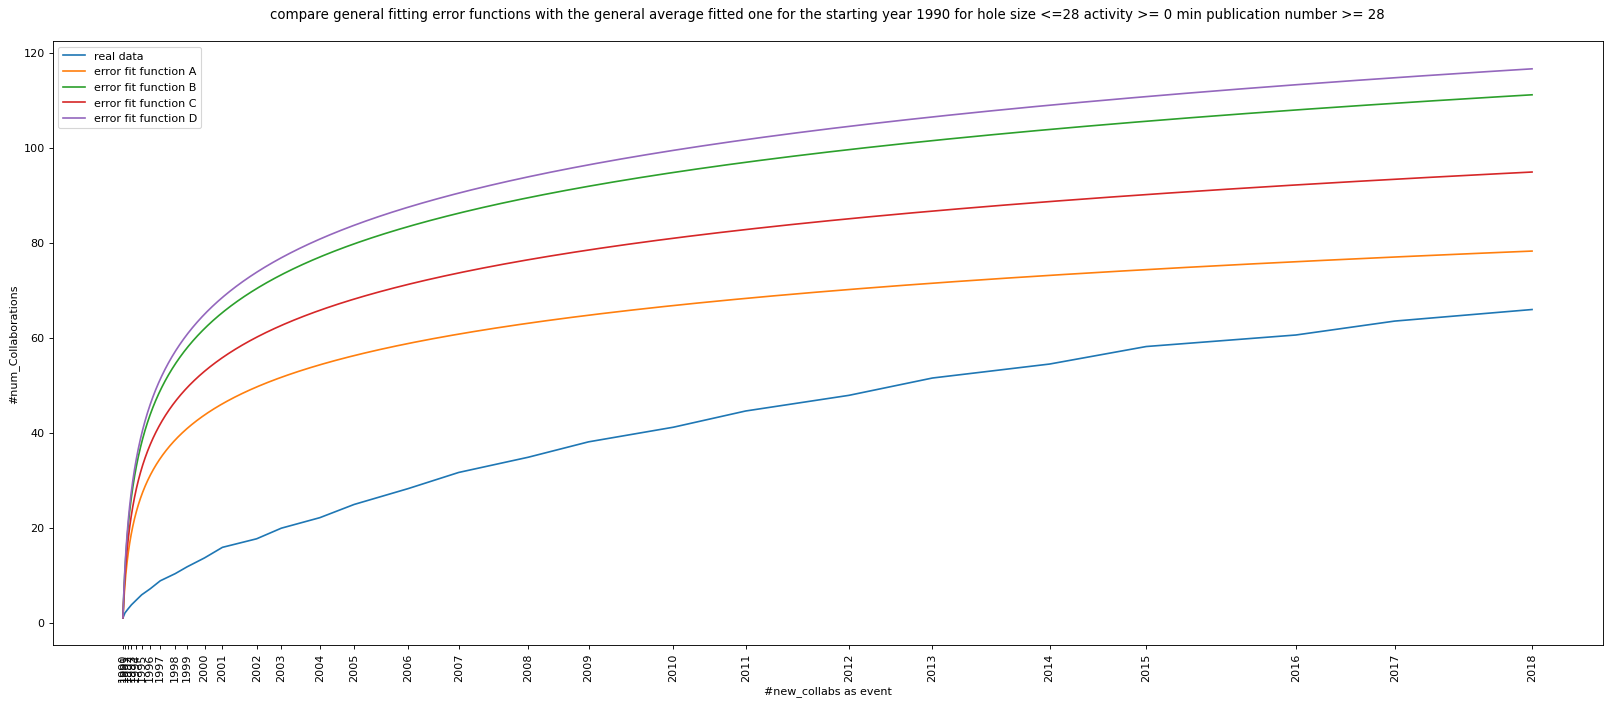

In [17]:
plot_all("1990")

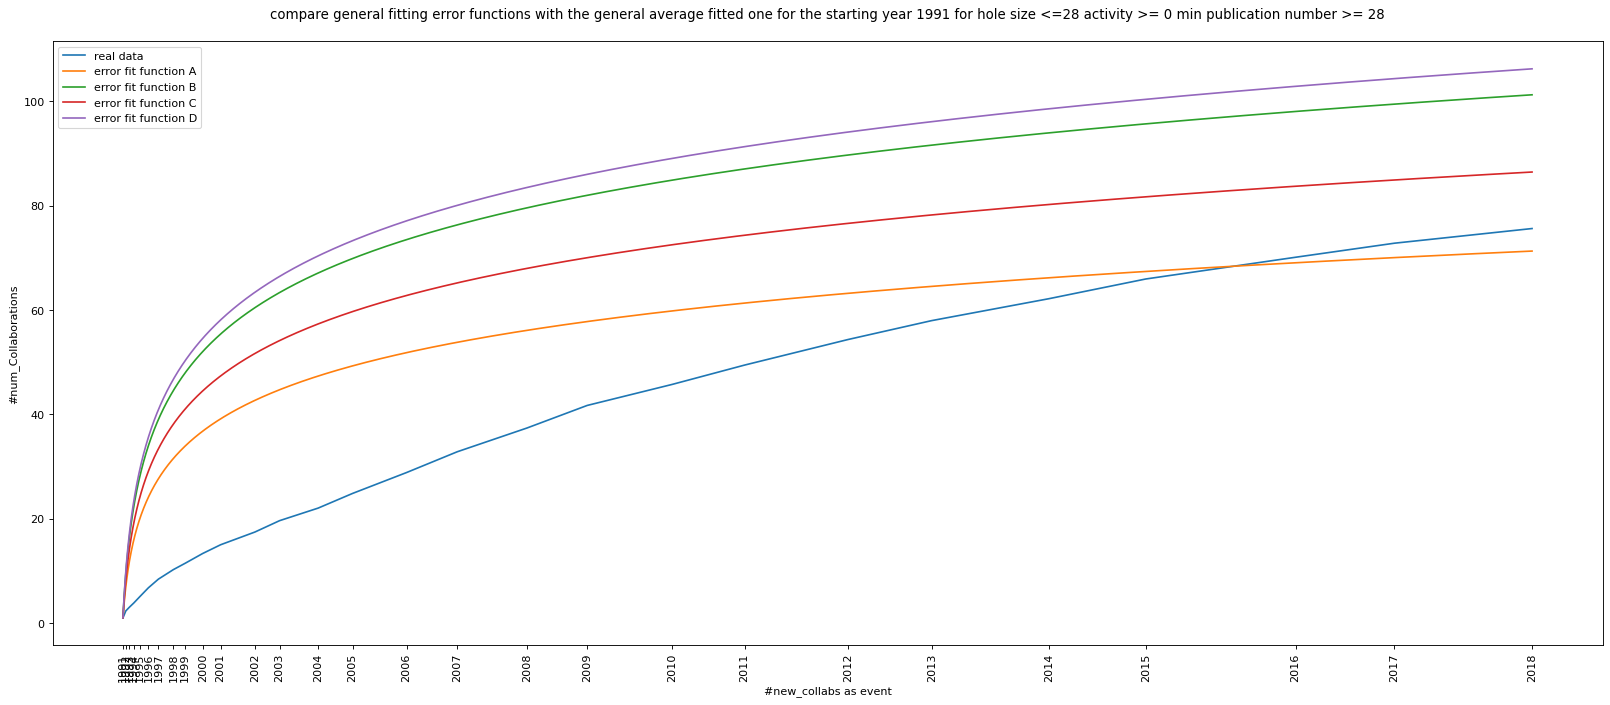

In [18]:
plot_all("1991")

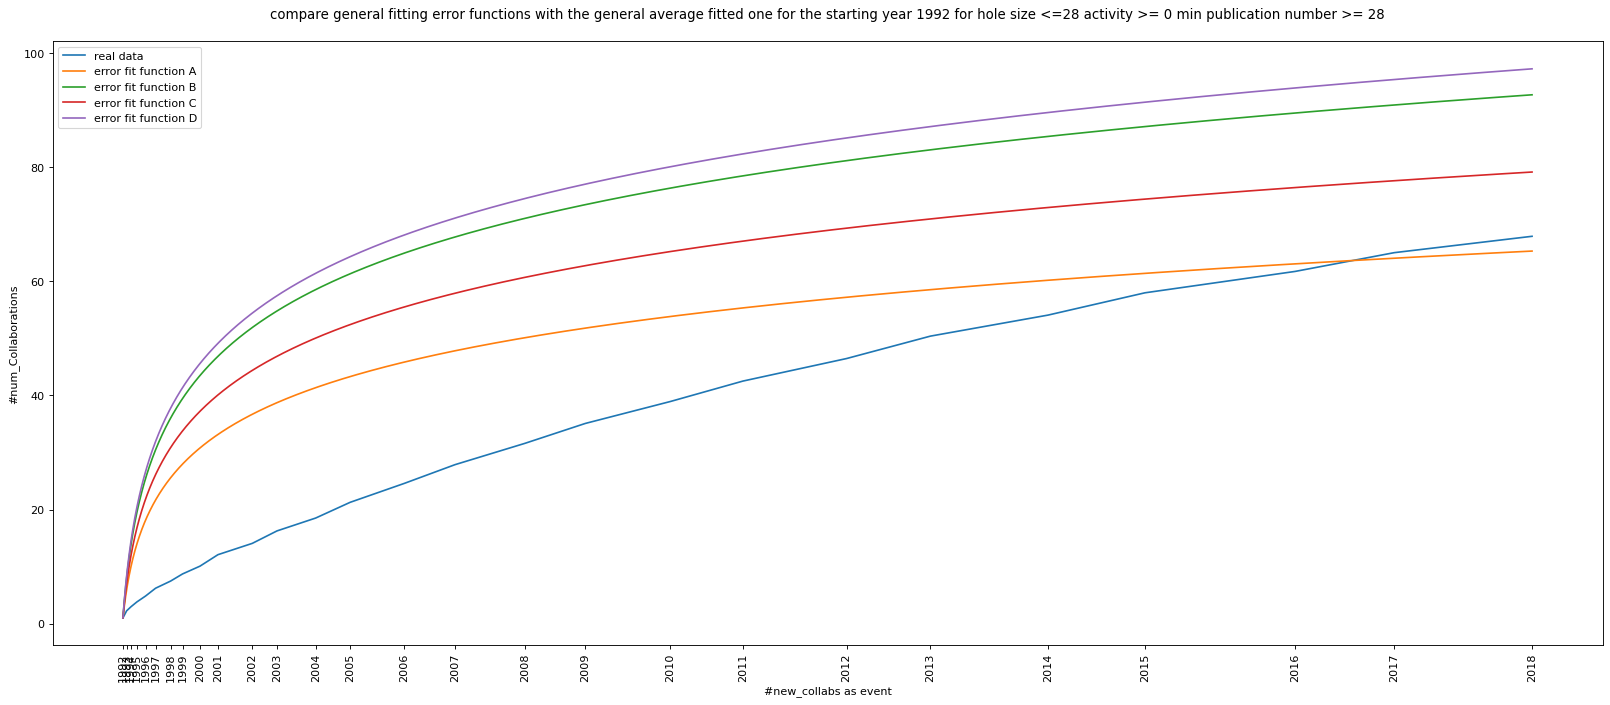

In [19]:
plot_all("1992")

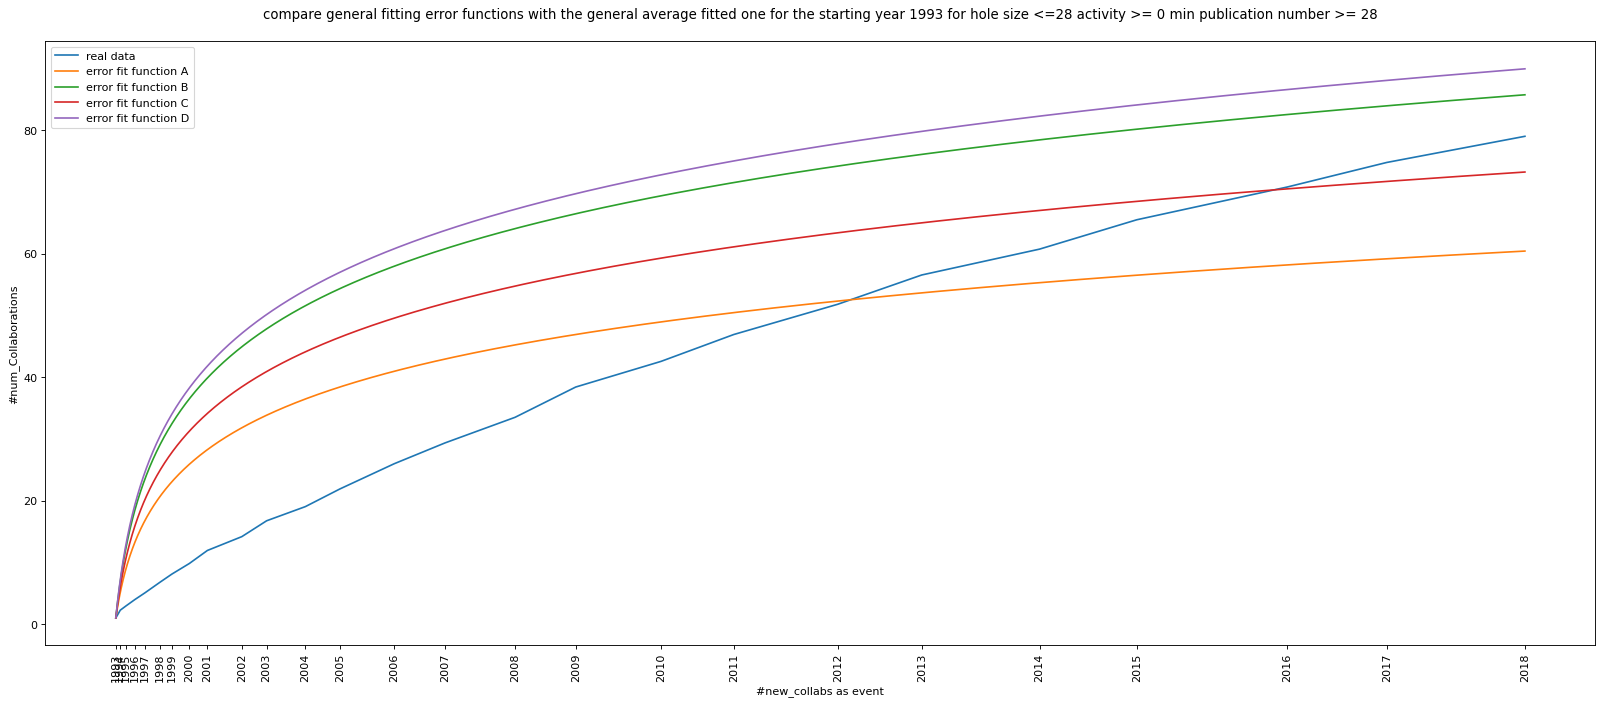

In [20]:
plot_all("1993")

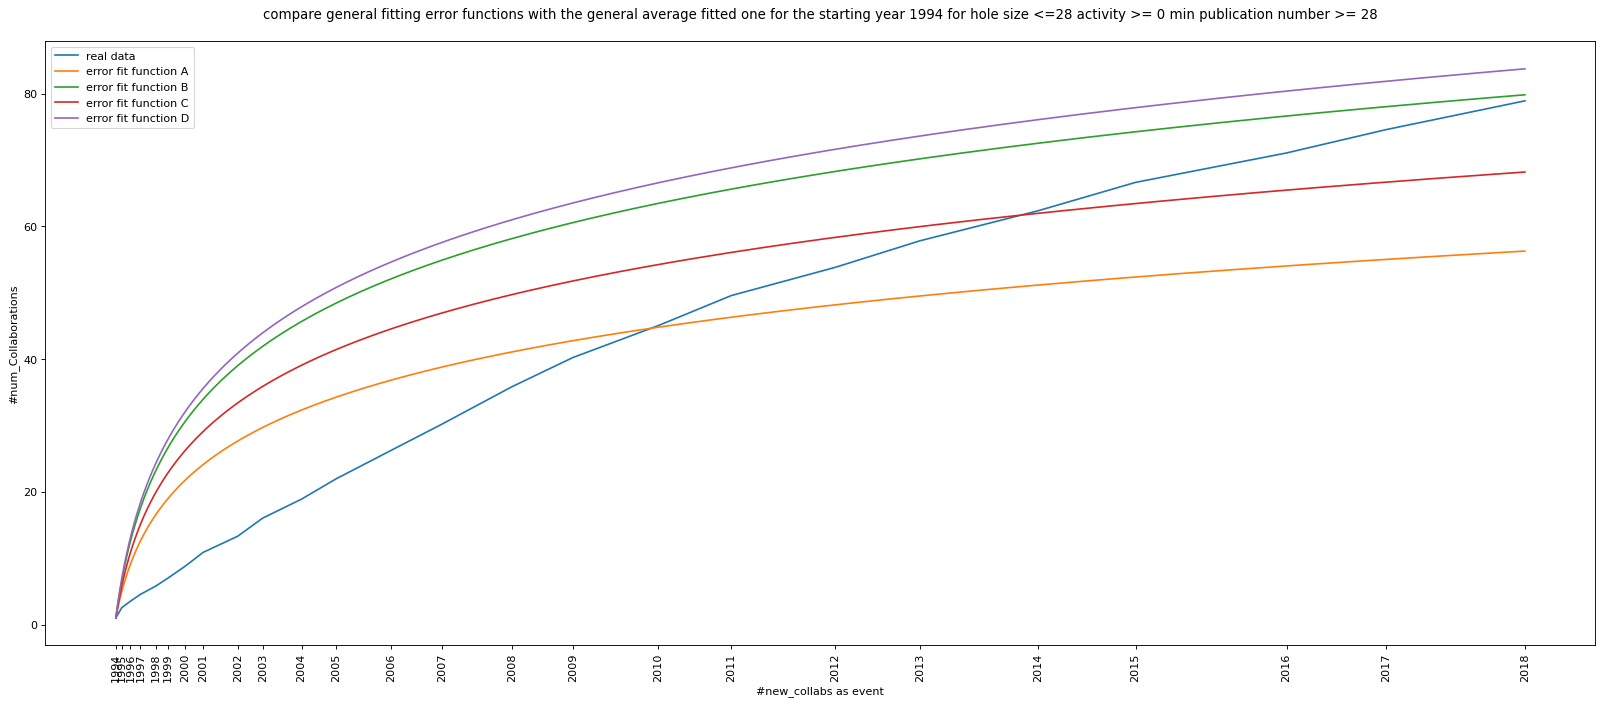

In [21]:
plot_all("1994")

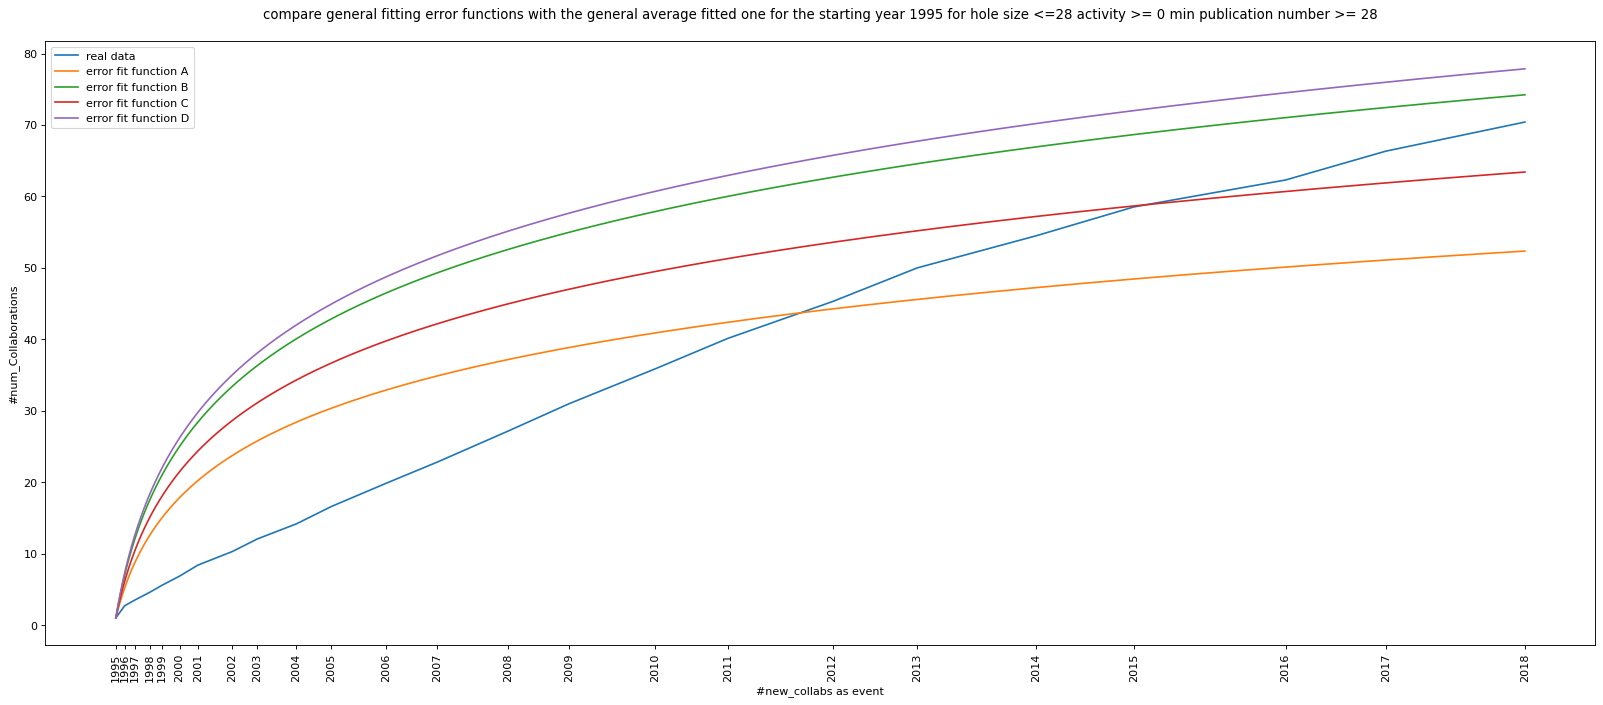

In [22]:
plot_all("1995")

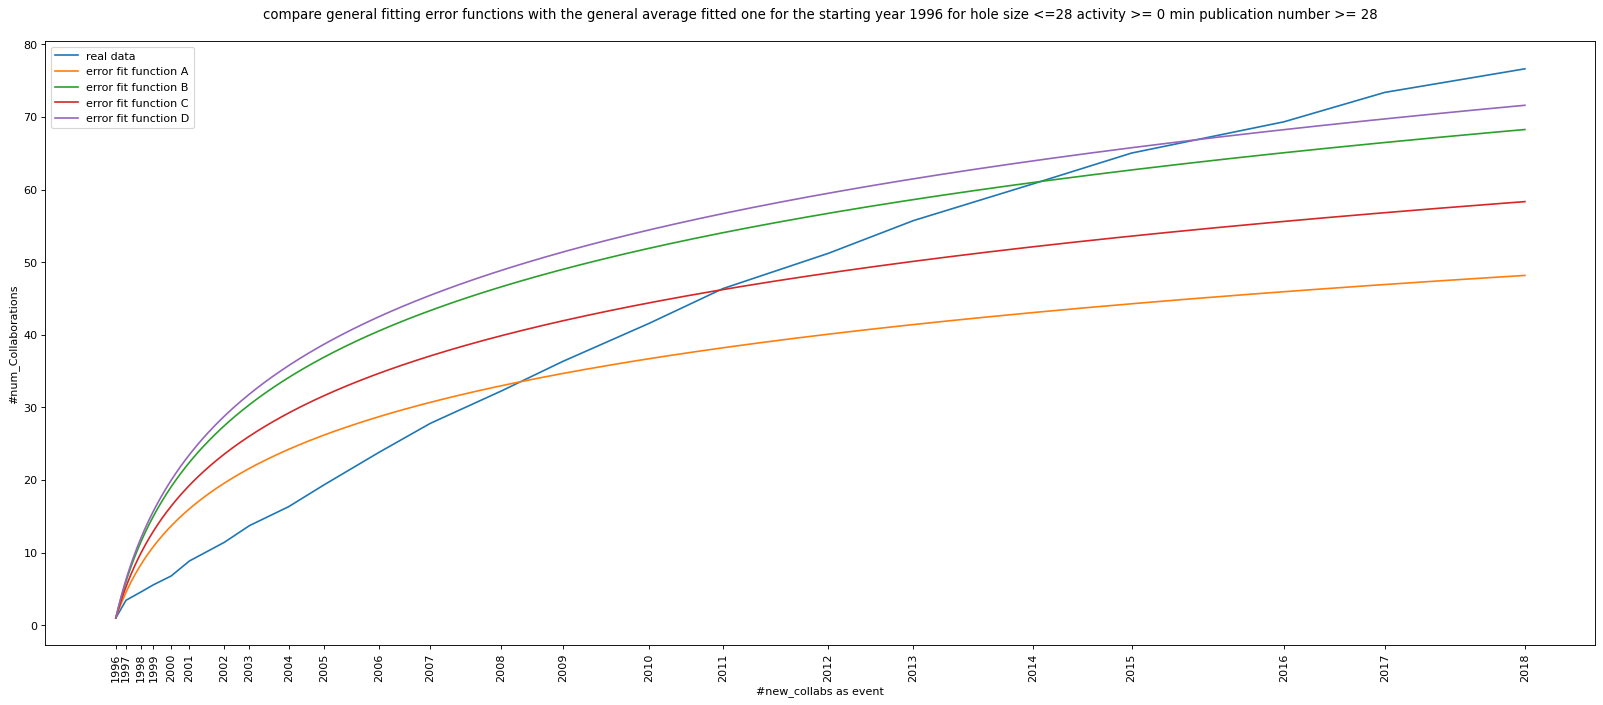

In [23]:
plot_all("1996")

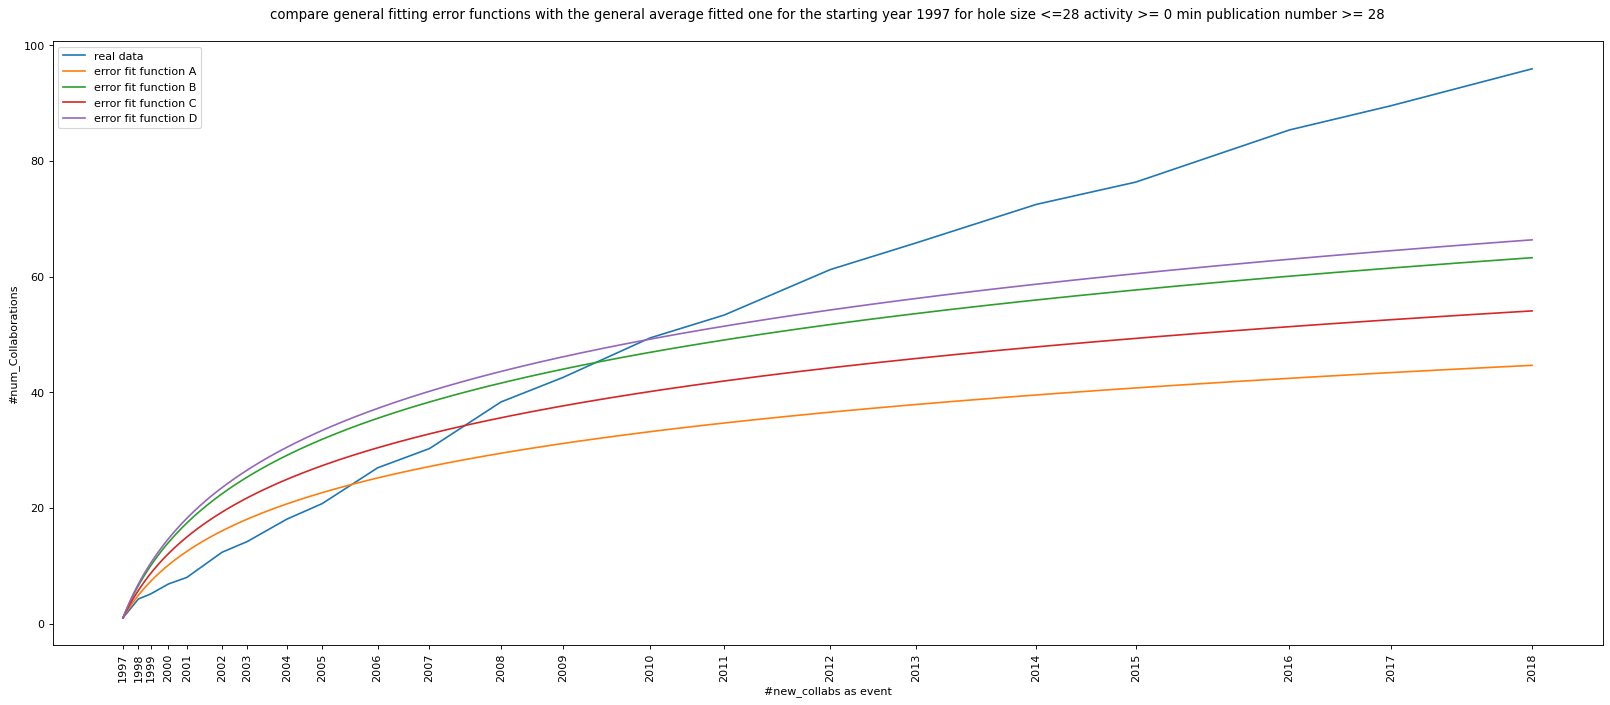

In [24]:
plot_all("1997")

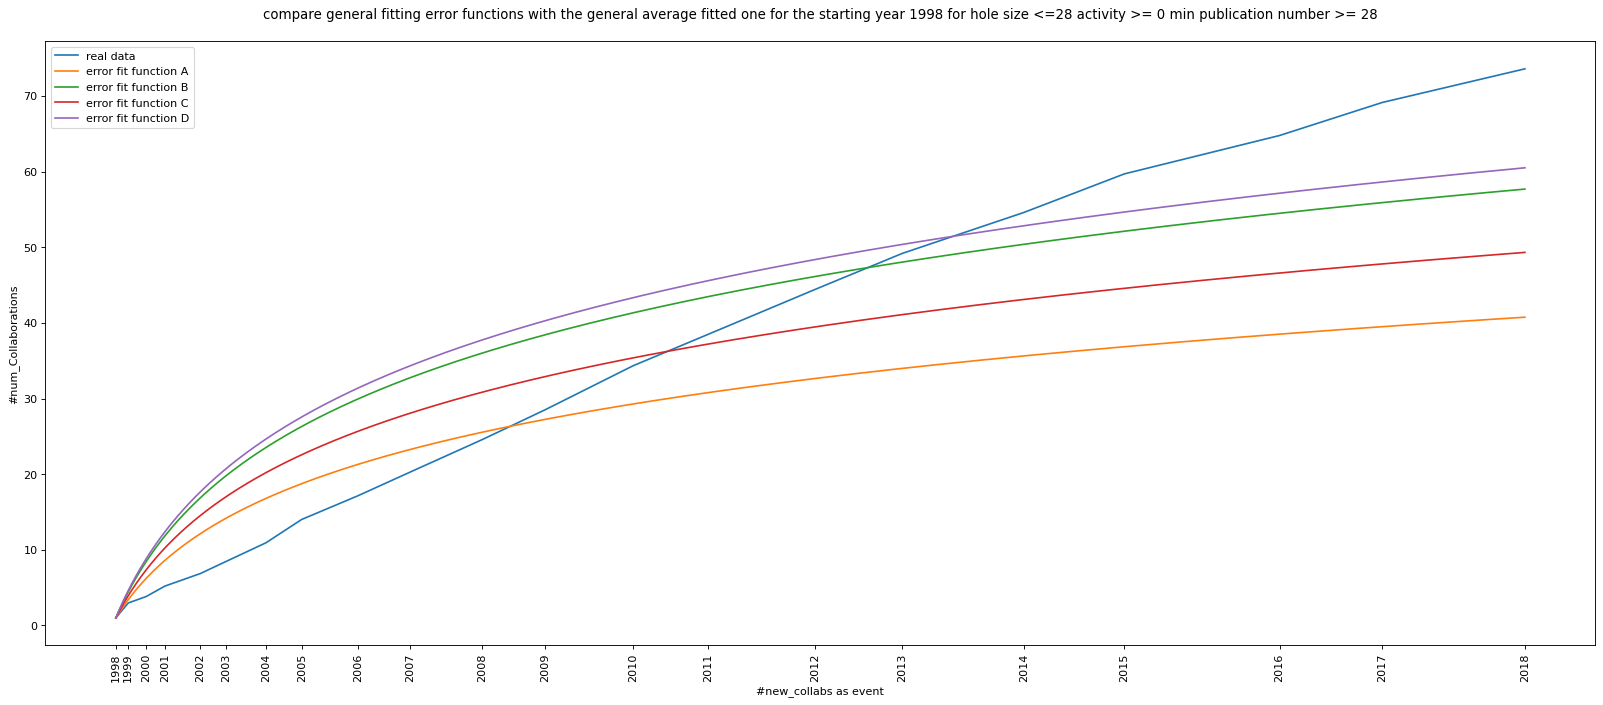

In [25]:
plot_all("1998")

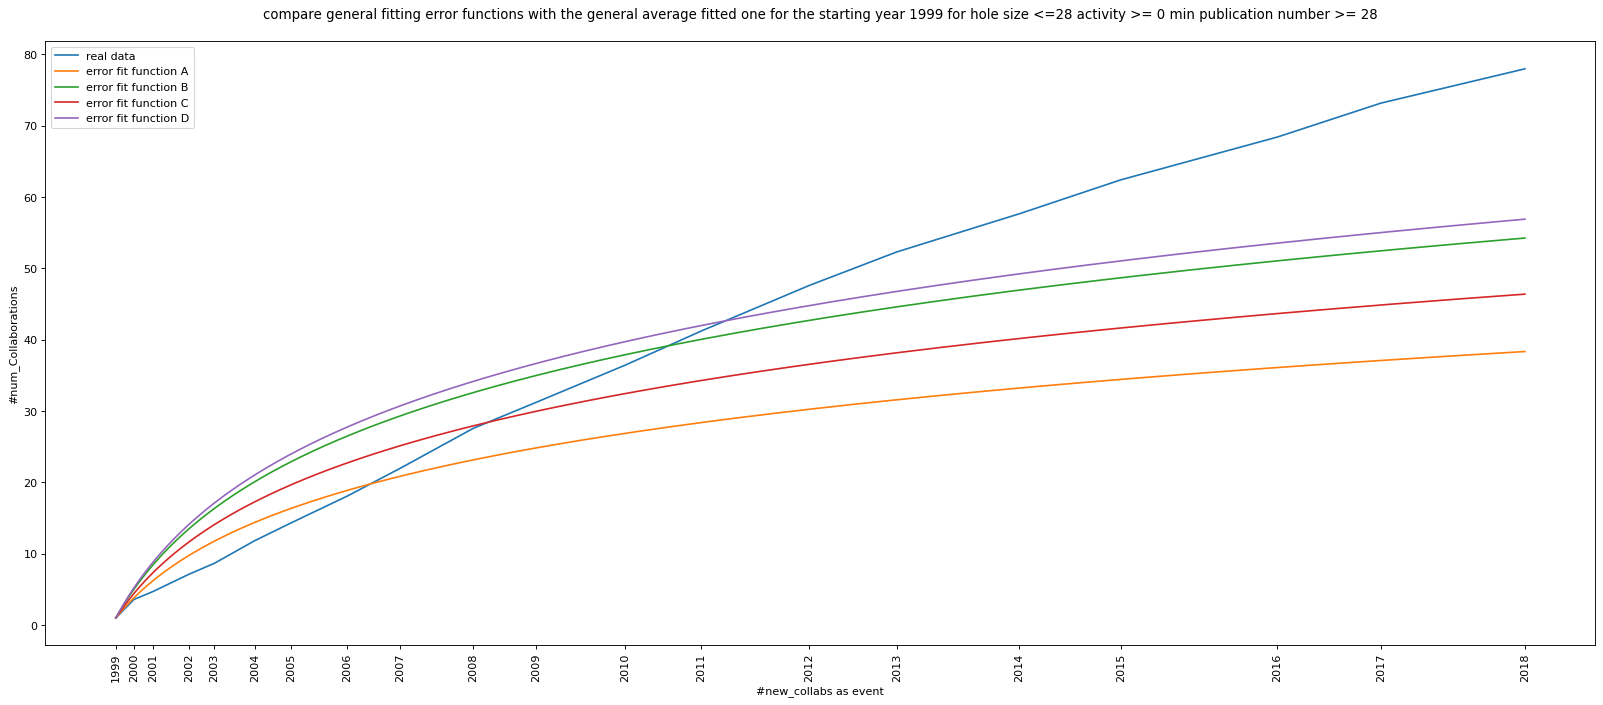

In [26]:
plot_all("1999")

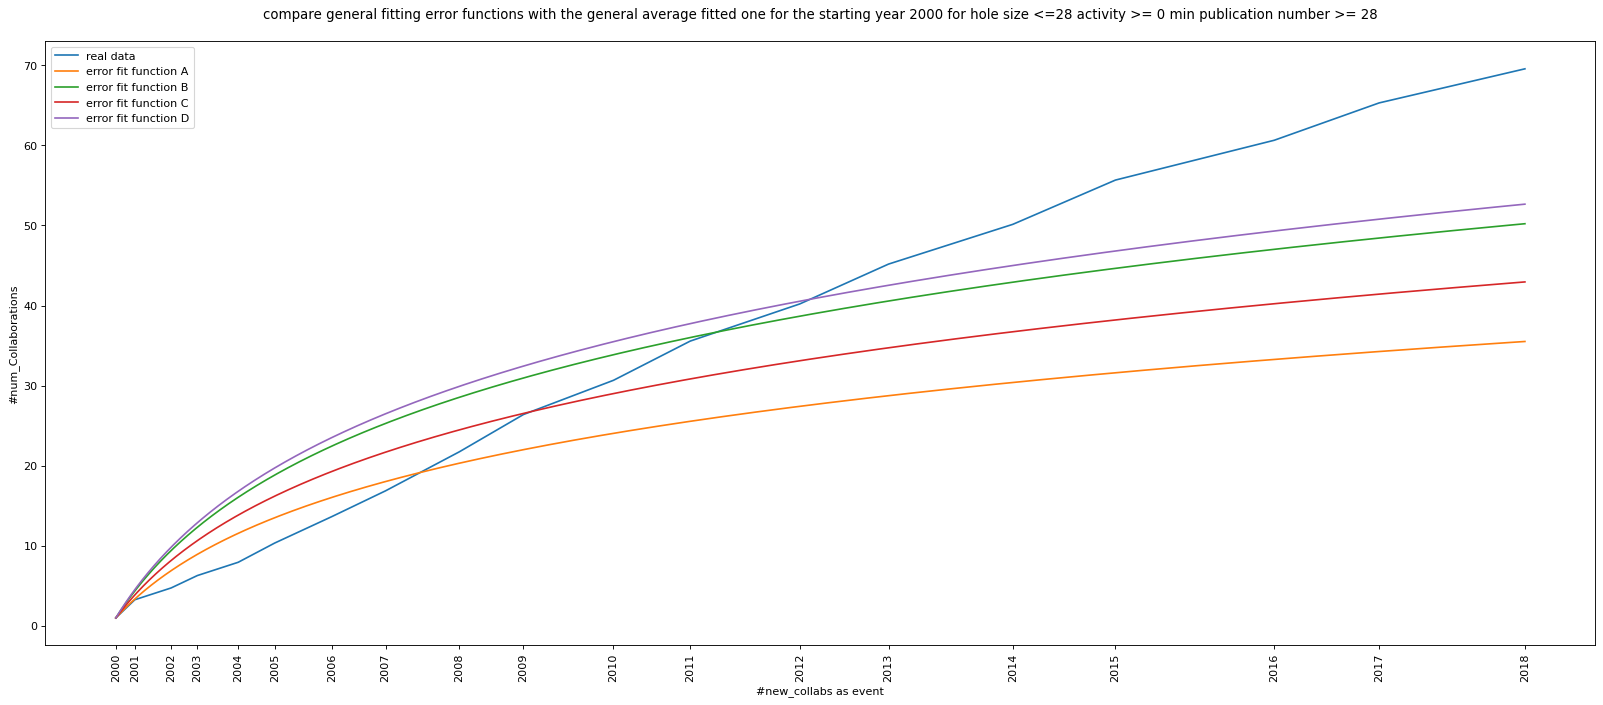

In [27]:
plot_all("2000")

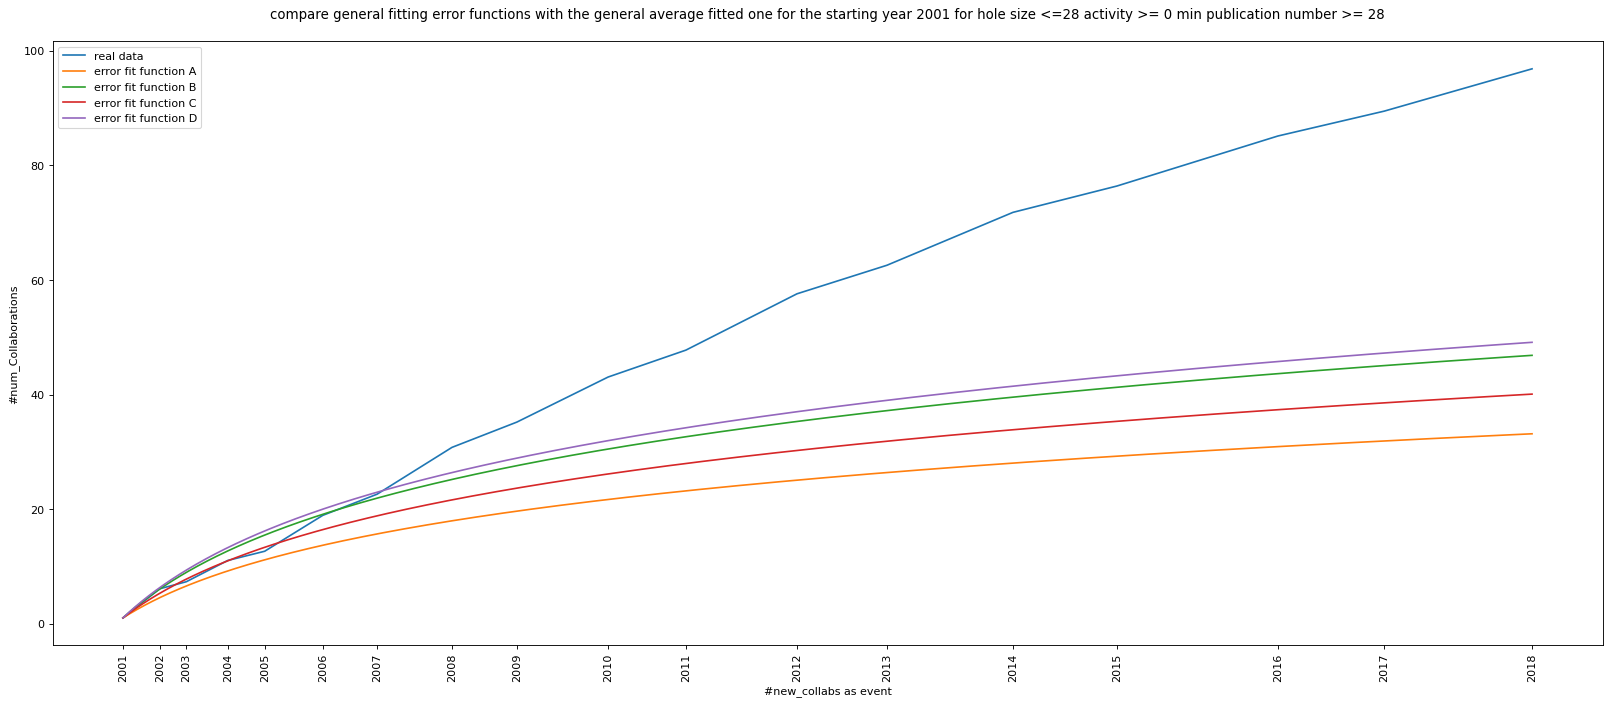

In [28]:
plot_all("2001")

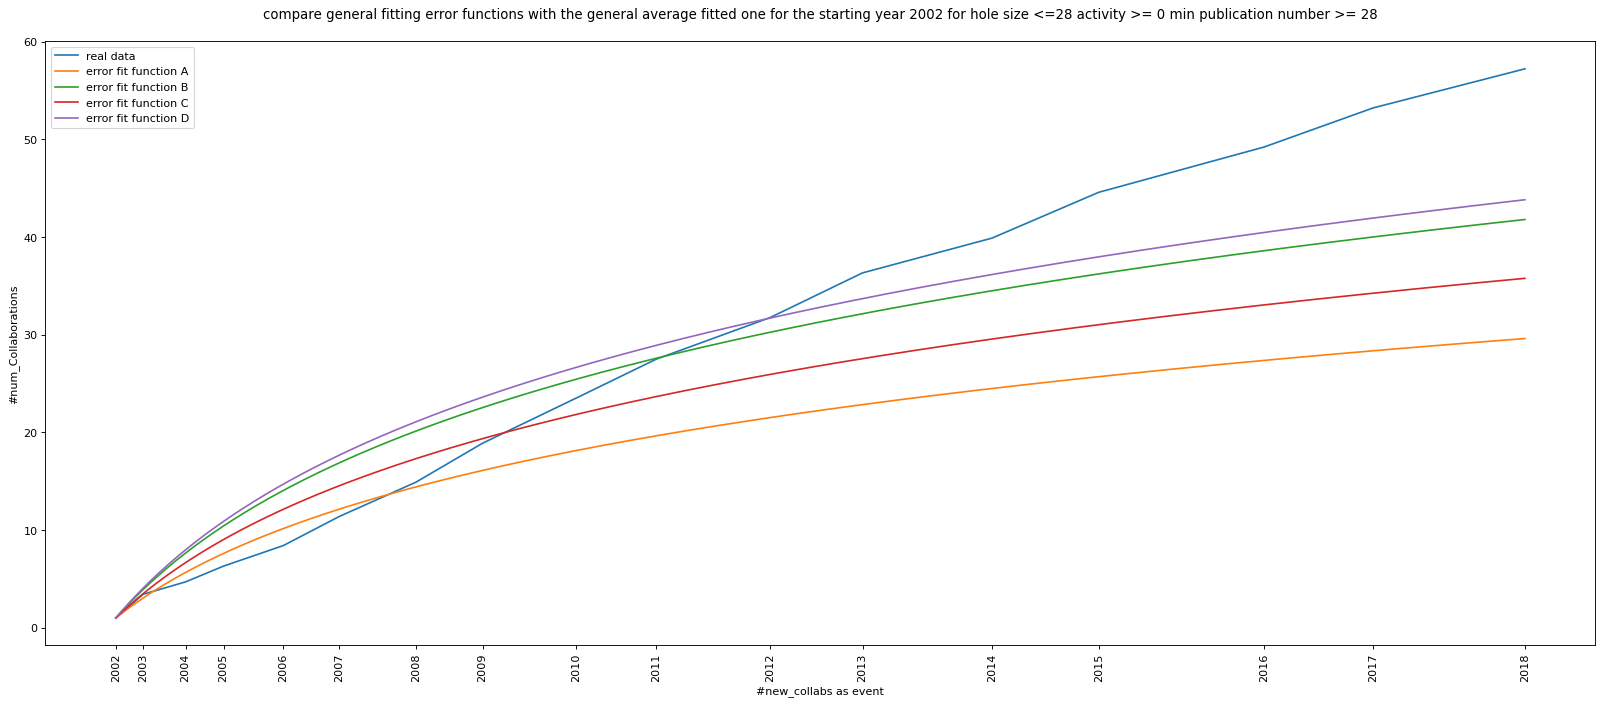

In [29]:
plot_all("2002")

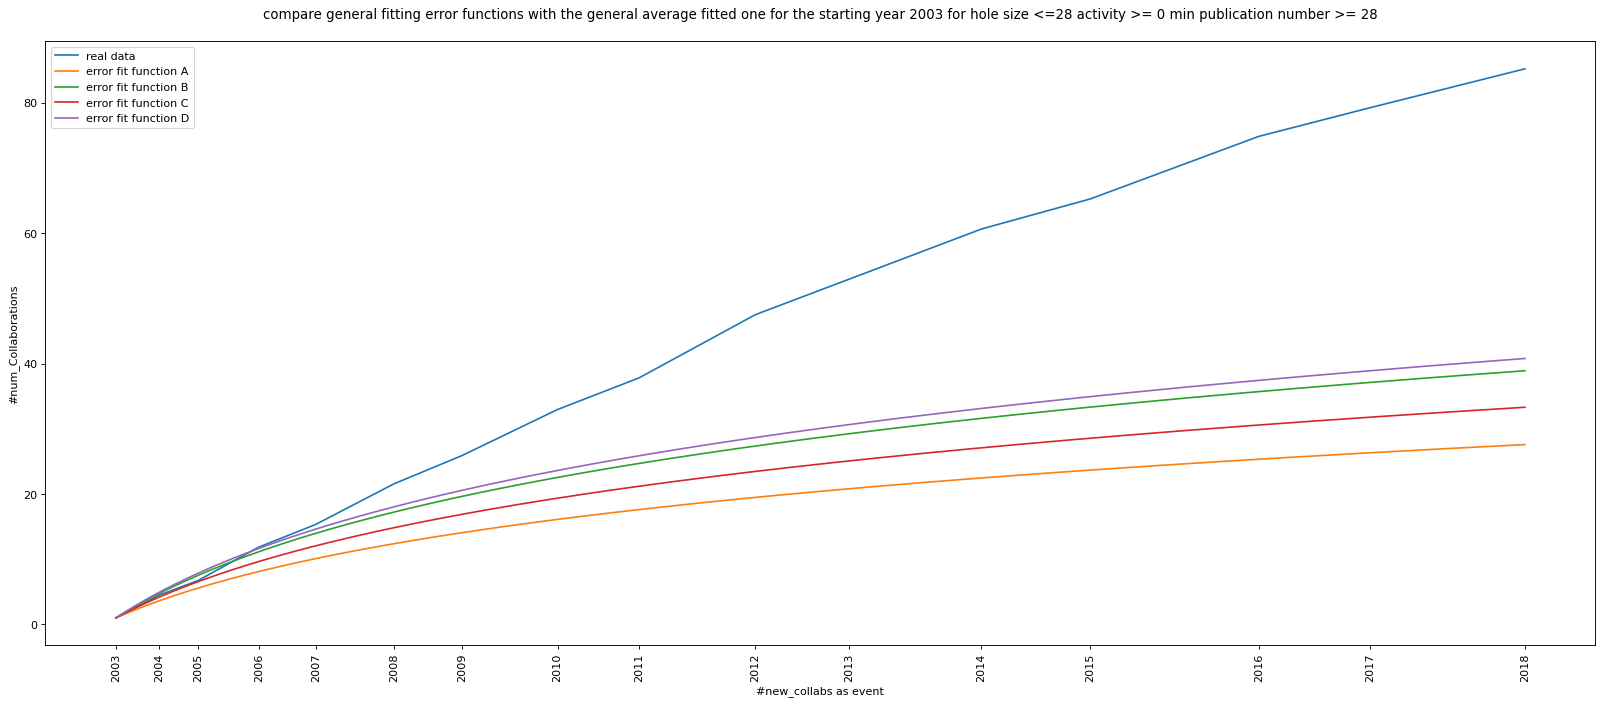

In [30]:
plot_all("2003")

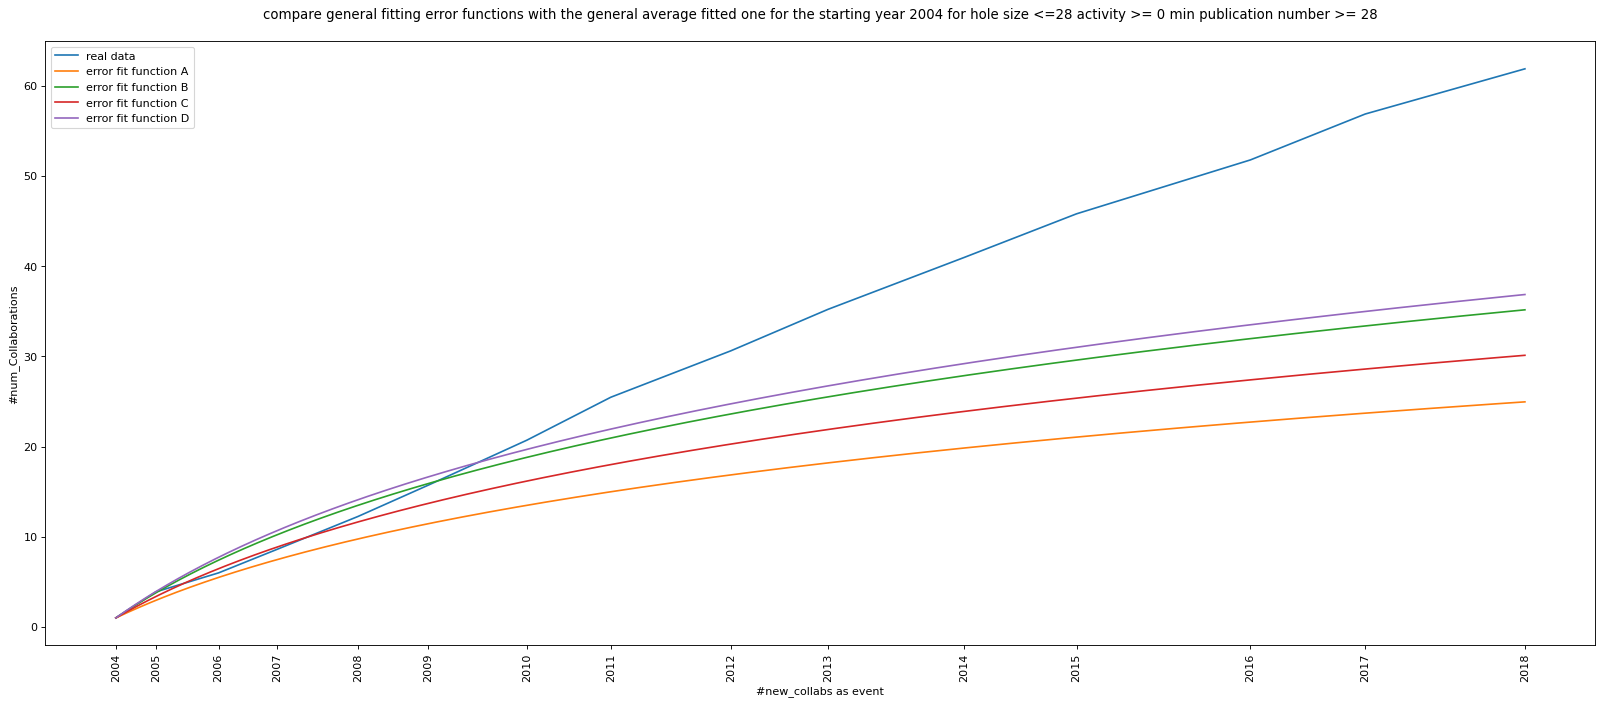

In [31]:
plot_all("2004")

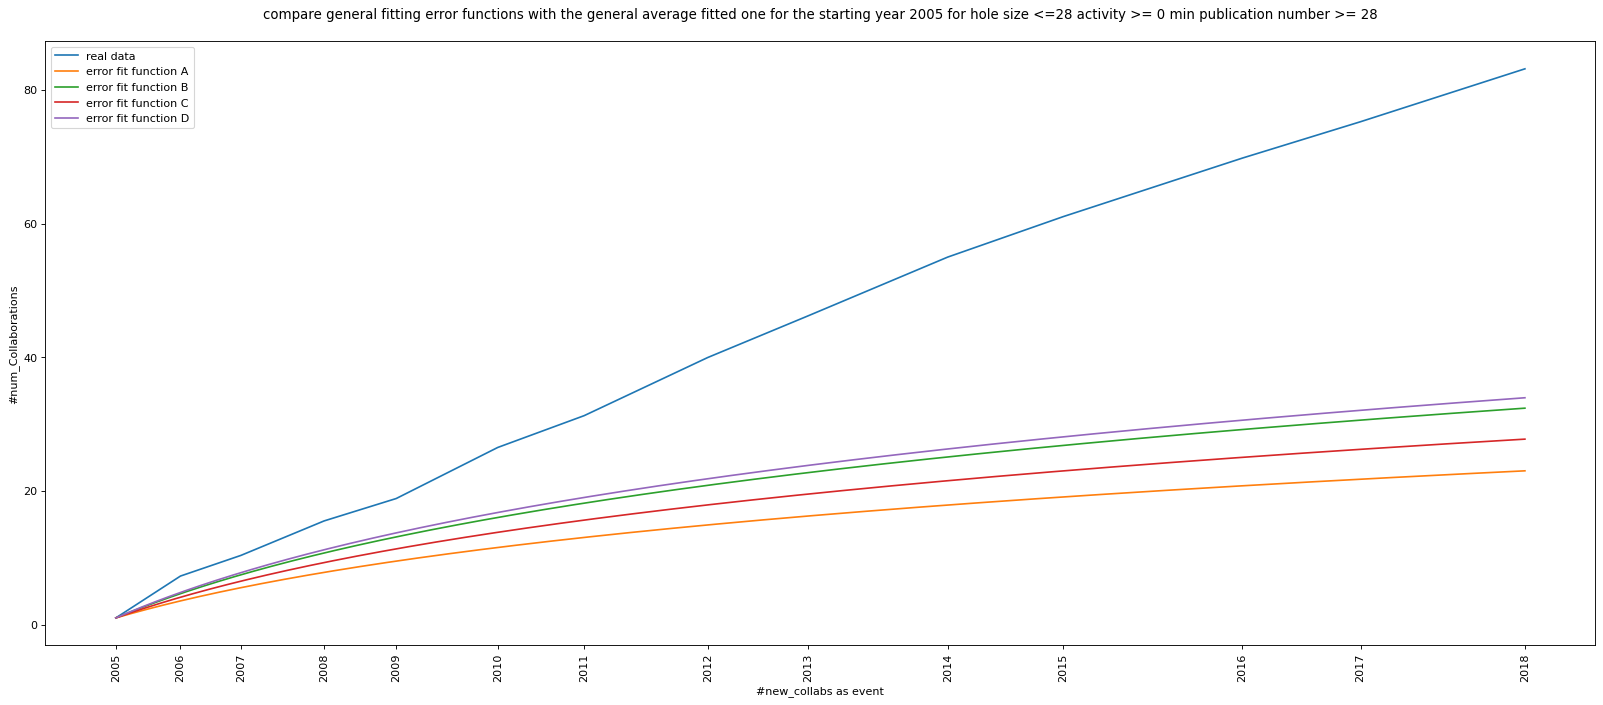

In [32]:
plot_all("2005")

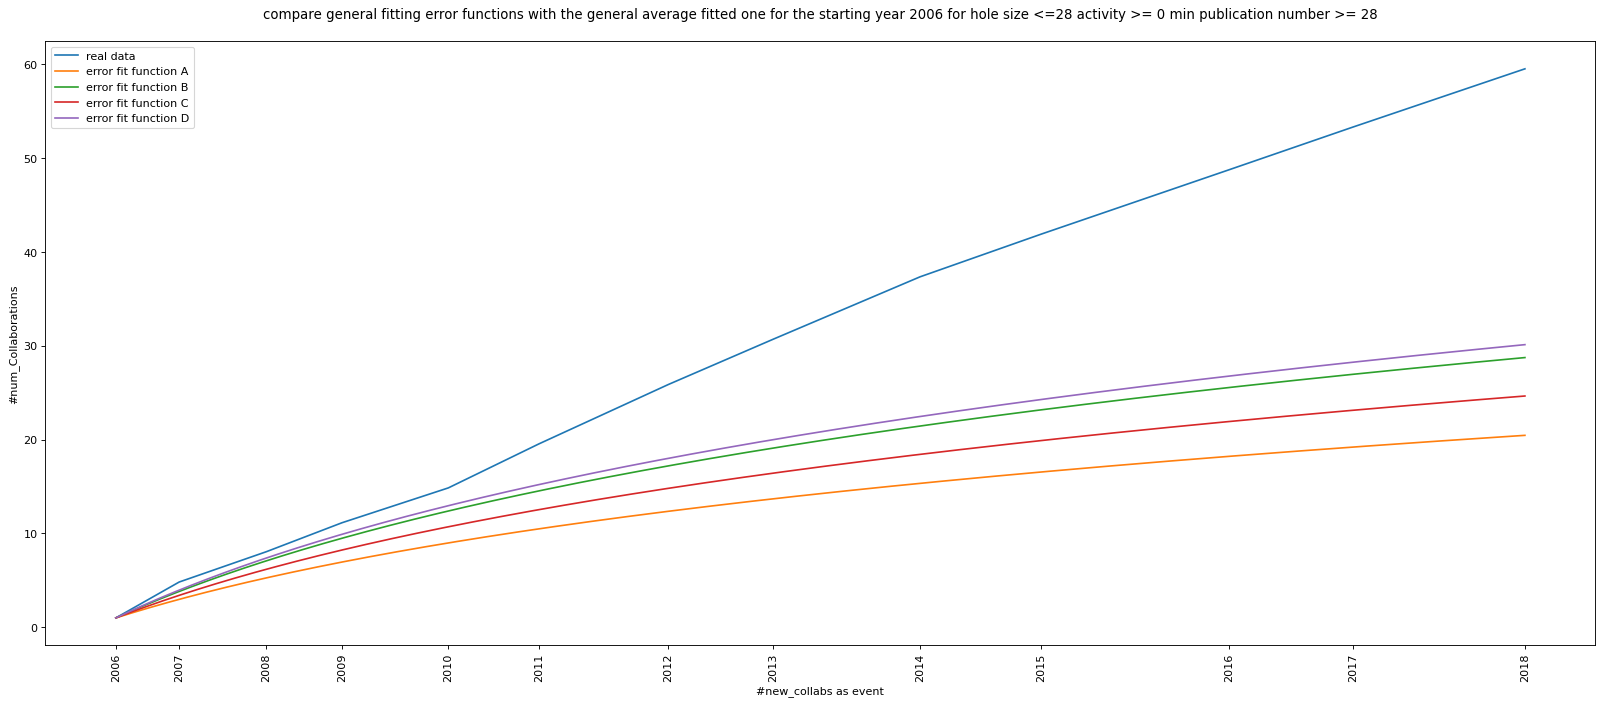

In [33]:
plot_all("2006")

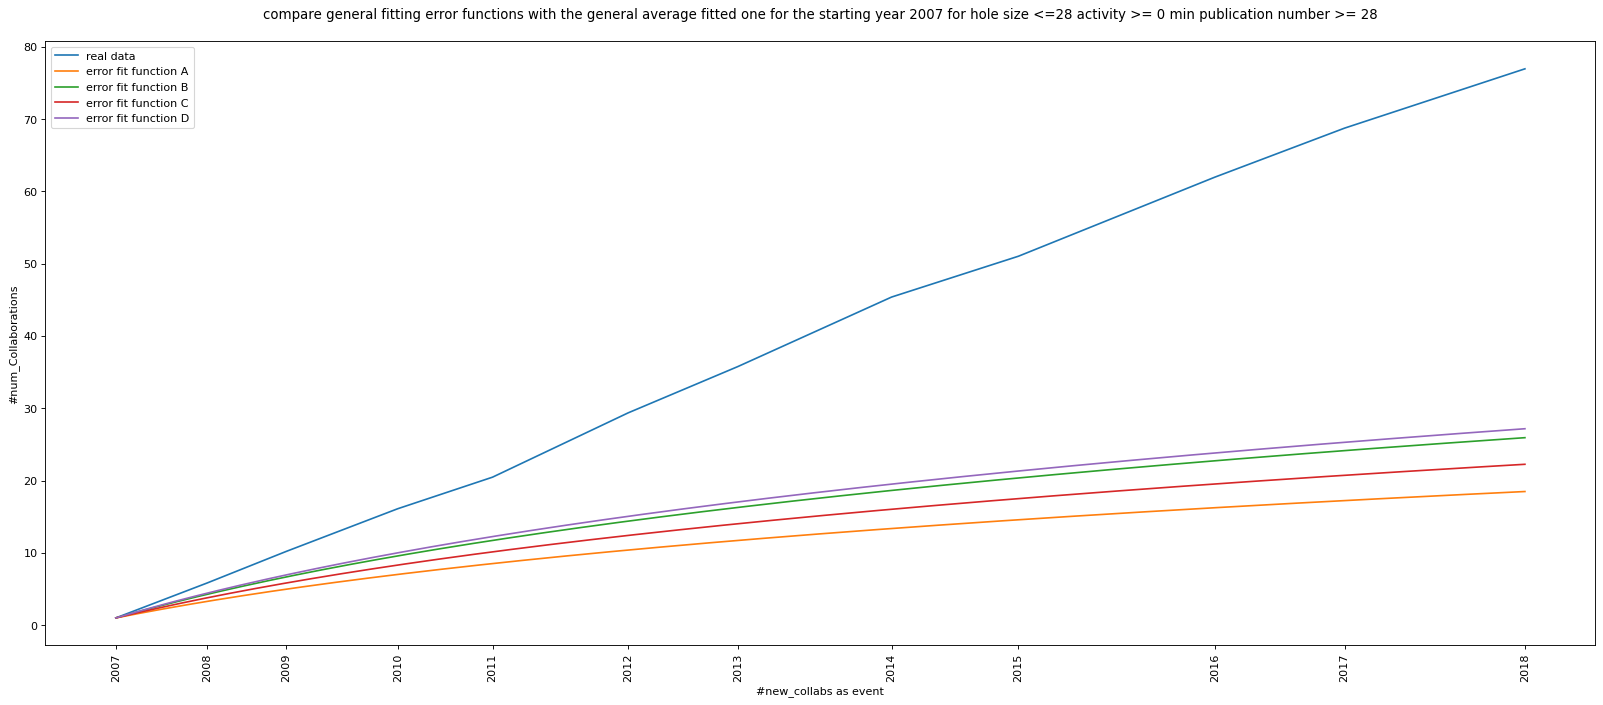

In [34]:
plot_all("2007")

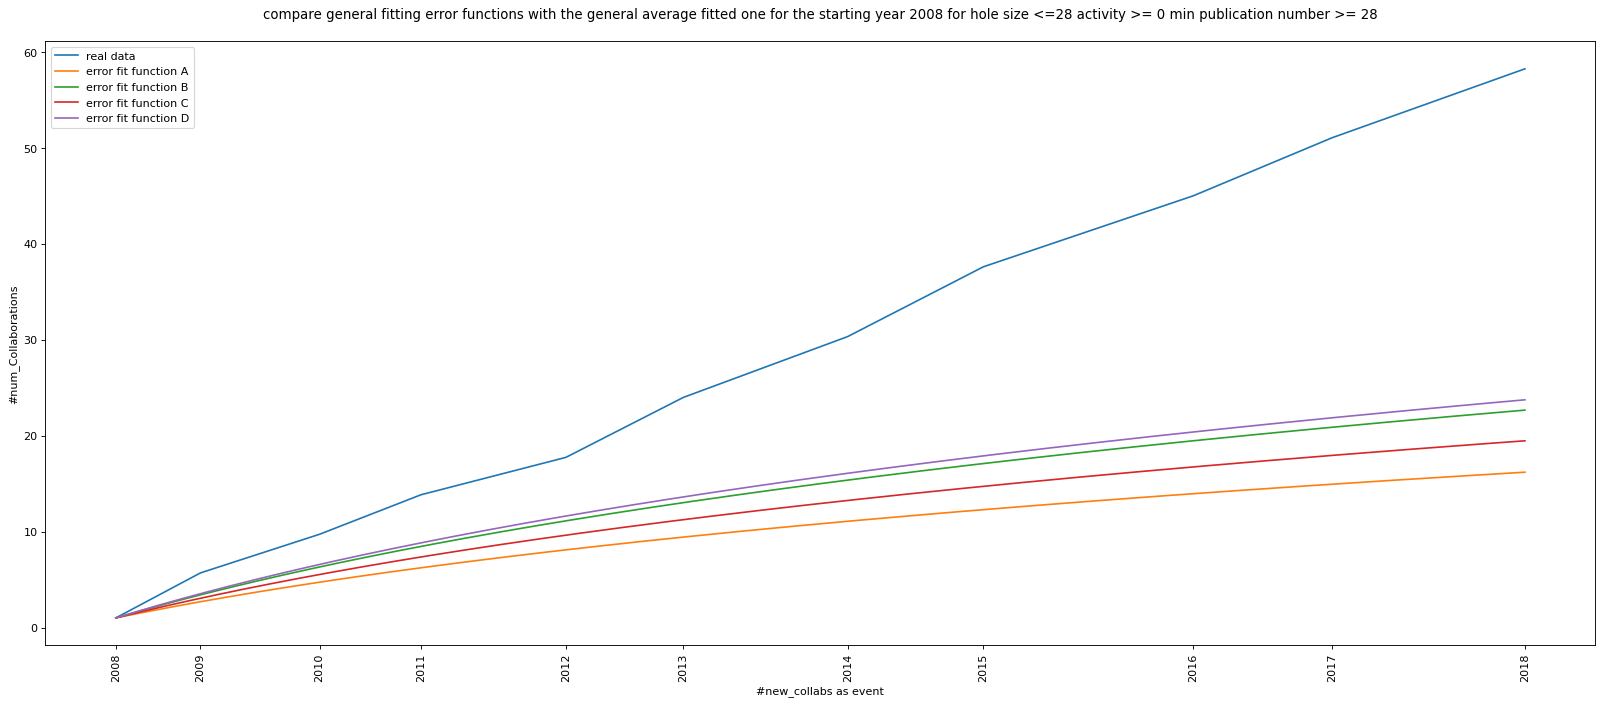

In [35]:
plot_all("2008")

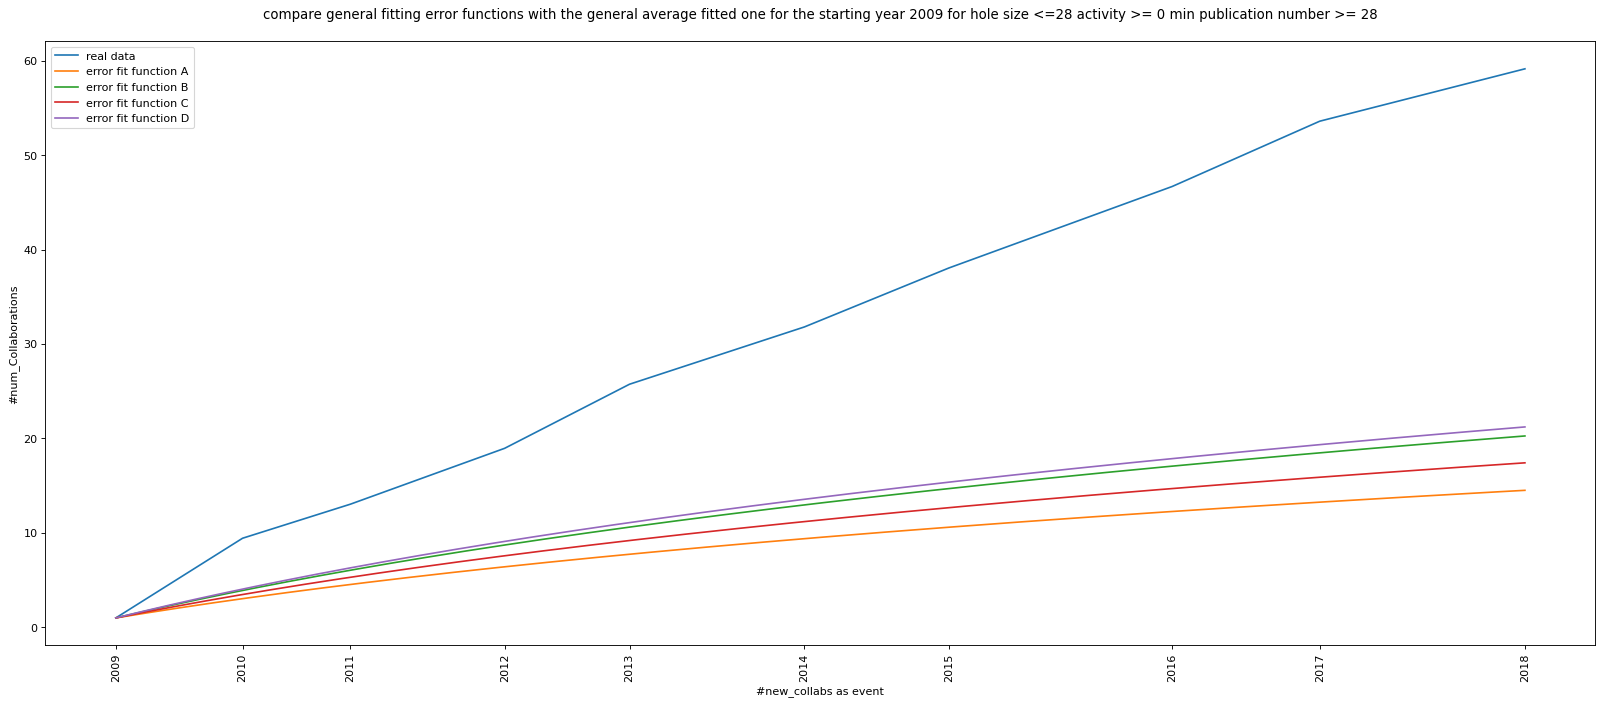

In [36]:
plot_all("2009")

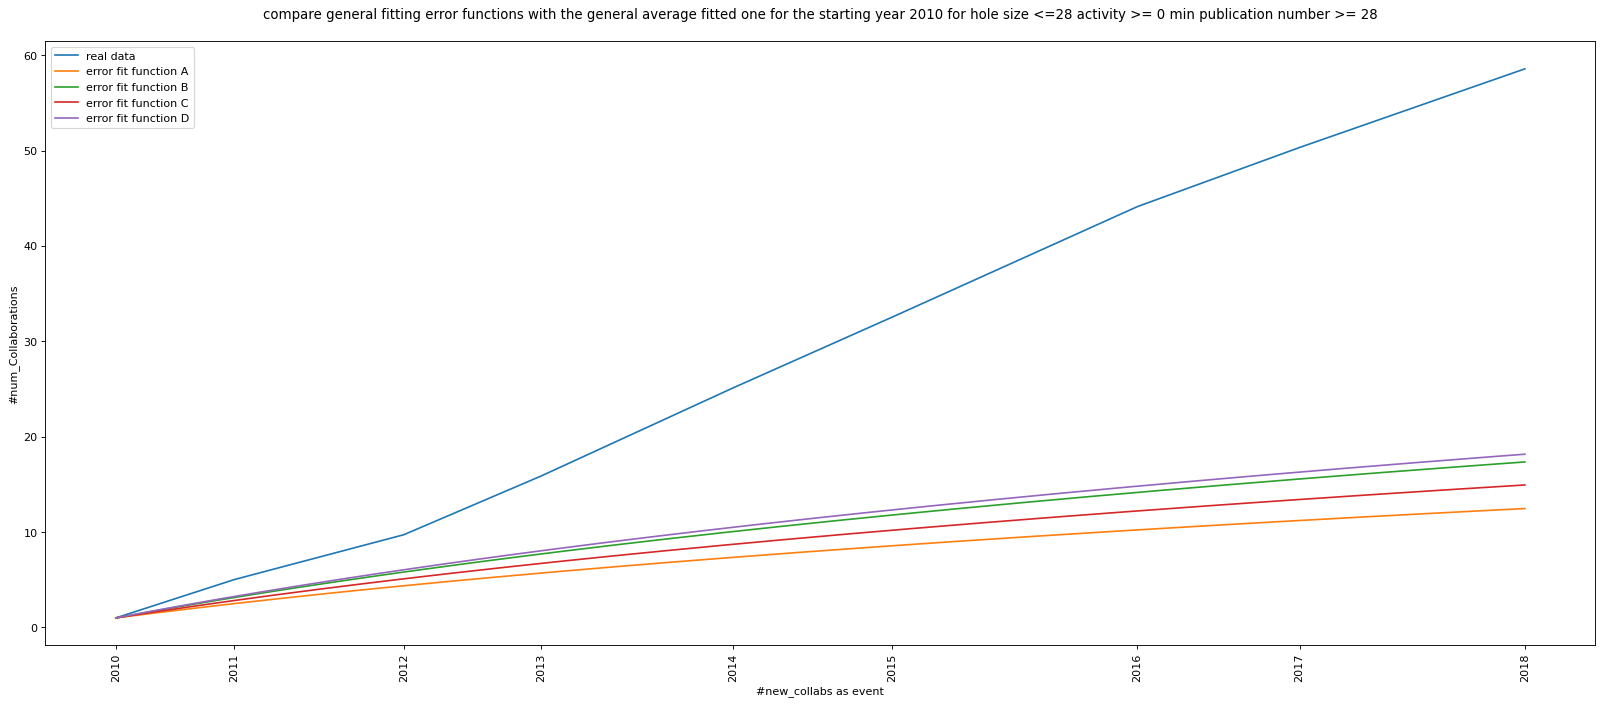

In [11]:
plot_all("2010")

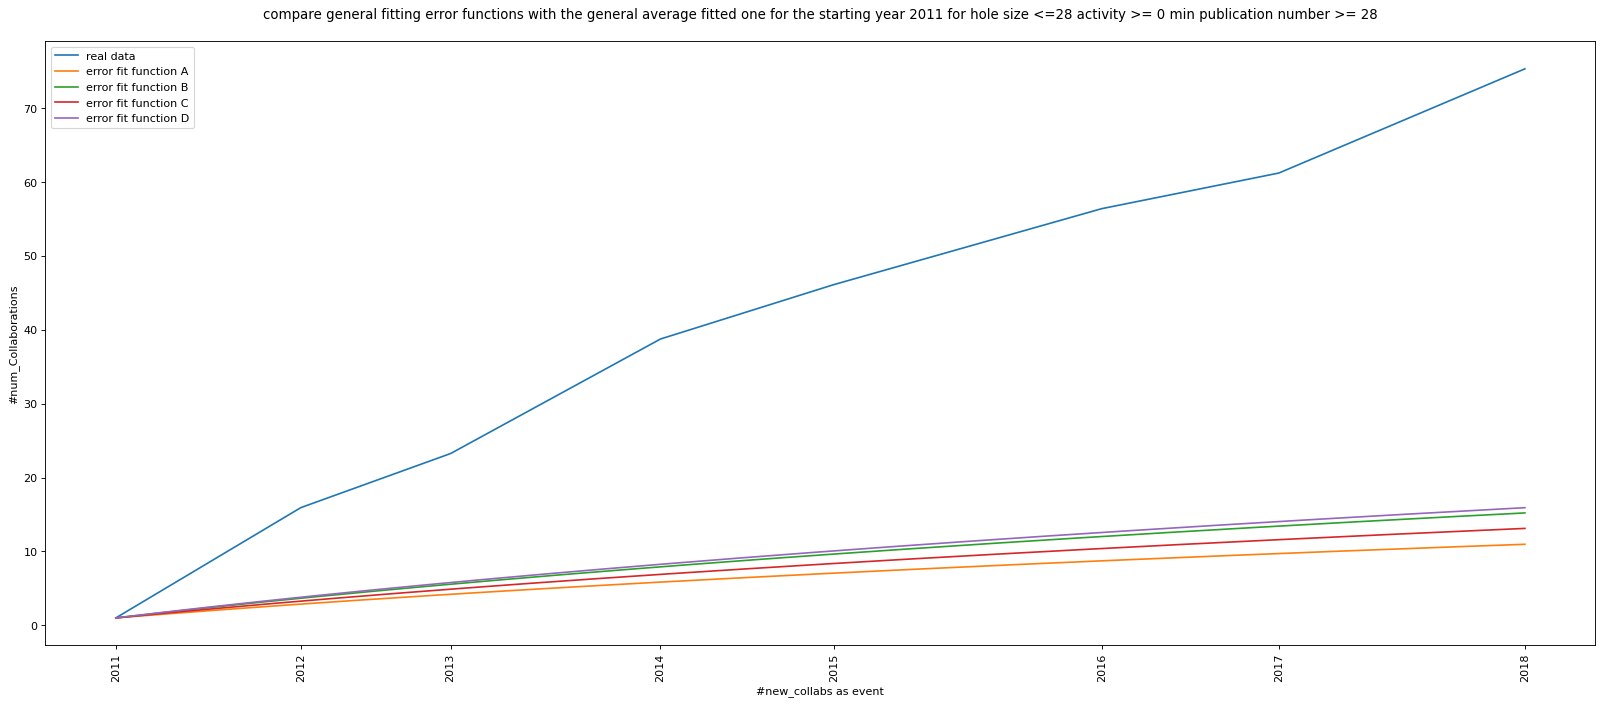

In [12]:
plot_all("2011")

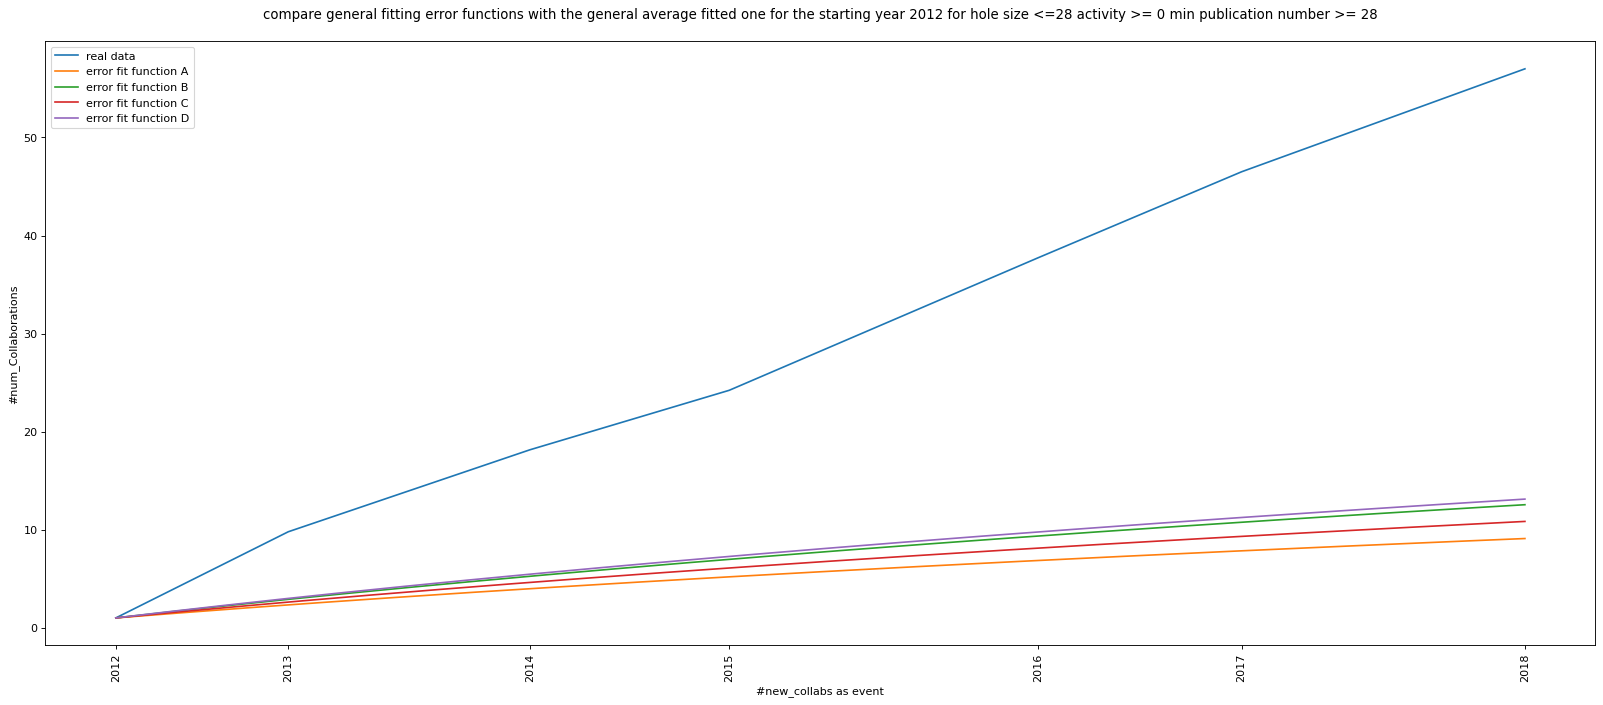

In [13]:
plot_all("2012")